In [1]:
from library.regression import LinearRegression
from library.selection import BackwardSelection
from library.selection import ForwardSelection
from library.selection import StepwiseSelection
from library.selection import Lasso_plot
from library.selection import Importance
from library.design_matrix import design_matrix
import pandas as pd
import altair as alt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
df = pd.DataFrame({'X1' : [1, 2, 2, 3, 3, 4, 5, 5, 5, 6, 7, 8, 8, 9, 9, 10, 11, 11, 11, 12],
                   'X2' : [-1, 2, 2, 2, 2, 7, 7, 8, 8, 8, 3, 4, 4, 5, 6, 9, 10, 10, 11, 12],
                   'X1c' : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                   'X2c' : [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
                   'y' : [-3, 7, 8, 5, 9, 20, 19, 19, 18, 20, 15, 15, 16, 18, 22, 32, 31, 34, 33, 37]})

# **Design Matrix**

In [3]:
dm = design_matrix(df, intercept = False, 
                   category = ['X1c', 'X2c'], 
                   interaction = [['X1c', 'X2'], ['X1c', 'X2c'], ['X2c', 'X1']])

In [4]:
dm.head()

,X1,X2,y,X1c_0,X2c_0,X1c_0_X2,X1c_0_X2c_0,X2c_0_X1
0,1,-1,-3,1,1,-1,1,1
1,2,2,7,1,1,2,1,2
2,2,2,8,1,1,2,1,2
3,3,2,5,1,1,2,1,3
4,3,2,9,1,1,2,1,3


# **Regression**

In [5]:
model = LinearRegression(df)

In [6]:
model.fit(['X1', 'X2', 'X1c', 'X2c'], 'y',
          category = ['X1c', 'X2c'], 
          interaction = [['X1c', 'X2'], ['X1c', 'X2c'], ['X2c', 'X1']], 
          ascending = False)

In [7]:
model.summary(VIF = True)

Factor                                                 Coefficient         Pr(|t|>0)           VIF            
Intercept                                              0.8146              0.7133                             
X1                                                     0.1134              0.9265              109.0928       
X2                                                     2.9542              0.0045              58.4264        
X1c_1                                                  5.2748              0.4130              63.6402        
X2c_1                                                  2.0527              0.7640              73.4726        
X1c_1_X2                                               -0.6404             0.4533              84.0899        
X1c_1_X2c_1                                            14.6574             0.0942              80.2400        
X2c_1_X1                                               -1.3373             0.2788              189.3404       
-

In [8]:
model.lack_of_fit()

Source              Sum of Square
Lack of Fit         22.4680   
Pure Error          14.0000   
F-value: 1.3373820279548454
Pr(Lack of Fit): 0.3836052815999076



In [9]:
model.hypothesis_testing([{'X1' : 1}], [0])

Test statistic: 0.008875053580688314
Pr: 0.9264990745747088


In [10]:
model.predict([{'X1' : 1}])

array([0.11340206])

In [11]:
model.predict_interval([{'X1' : 1}])

[[-4.54936822392351, 4.776172347625151]]

In [12]:
model.predict_interval([{'X1' : 1}], mode = 'mean')

[[-2.536028693471021, 2.7628328171726615]]

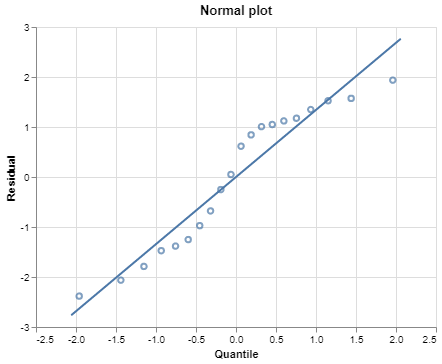

In [13]:
model.normal_plot()

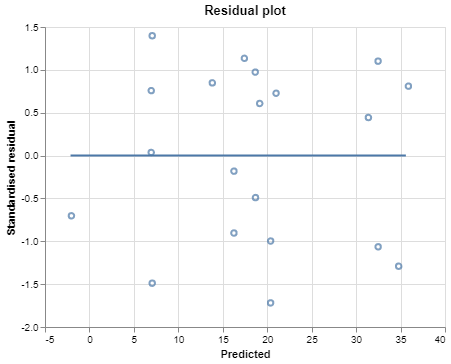

In [14]:
model.residual_plot()

In [15]:
model.residual()

array([-0.97372872,  0.05013321,  1.05013321, -2.06326885,  1.93673115,
        1.34863894,  1.5725472 , -1.38169814, -2.38169814,  0.84221012,
        1.17539673, -1.25180123, -0.25180123, -0.67899919,  1.00720491,
        0.615406  , -1.47448164,  1.52551836, -1.78827754,  1.12183482])

In [16]:
model.std

array([[ 4.68792296e+00, -2.20092635e+00,  5.44225220e-01,
         8.86168333e+00, -4.31023910e+00,  4.78045181e-01,
        -9.94062919e+00,  1.29816724e+00],
       [-2.20092635e+00,  1.44900845e+00, -7.04923030e-01,
        -6.57928161e+00,  4.03372623e+00,  1.11486416e-14,
         4.32352792e+00, -7.44085420e-01],
       [ 5.44225220e-01, -7.04923030e-01,  7.19003889e-01,
         3.57495422e+00, -3.69411349e+00, -3.41460843e-01,
         7.40477200e-01,  2.42014773e-01],
       [ 8.86168333e+00, -6.57928161e+00,  3.57495422e+00,
         3.86805083e+01, -2.55833377e+01, -1.98047289e+00,
        -1.55558648e+01,  4.48968206e+00],
       [-4.31023910e+00,  4.03372623e+00, -3.69411349e+00,
        -2.55833377e+01,  4.46566539e+01,  2.97070934e+00,
         1.84197004e+01, -6.36639662e+00],
       [ 4.78045181e-01,  1.05575569e-14, -3.41460843e-01,
        -1.98047289e+00,  2.97070934e+00,  6.82921687e-01,
        -3.14143976e+00, -1.70730422e-01],
       [-9.94062919e+00,  4.323527

In [17]:
model.vif('X1')

109.09278350797211

# **Selection**

In [18]:
BackwardSelection(dm, ['X1', 'X2', 'X1c_0', 'X2c_0', 'X1c_0_X2', 'X1c_0_X2c_0', 'X2c_0_X1'], 'y')

Variable in model: X1, X2, X1c_0, X2c_0, X1c_0_X2, X1c_0_X2c_0, X2c_0_X1
Variable Removed                                       Res S.S. before Removal            Res S.S. after Removal
X1c_0_X2                                               36.4680                            38.2933        
Test Statistic: 0.6006186227063708
p-value: 0.45334338680270525
Decision: Remove
------------------------------------------------------------------------------------------------------------------------
Variable in model: X1, X2, X1c_0, X2c_0, X1c_0_X2c_0, X2c_0_X1
Variable Removed                                       Res S.S. before Removal            Res S.S. after Removal
X1                                                     38.2933                            42.7437        
Test Statistic: 1.5108485935660347
p-value: 0.24079436221619221
Decision: Remove
------------------------------------------------------------------------------------------------------------------------
Variable in model: X2,

In [19]:
ForwardSelection(dm, ['X1', 'X2', 'X1c_0', 'X2c_0', 'X1c_0_X2', 'X1c_0_X2c_0', 'X2c_0_X1'], 'y')

Variable in model: 
Variable Entered                                       Res S.S. before Entered            Res S.S. after Entered
X2                                                     2155.7500                          201.1942       
Test Statistic: 174.8659275755904
p-value: 1.0411016493350189e-10
Decision: Enter
------------------------------------------------------------------------------------------------------------------------
Variable in model: X2
Variable Entered                                       Res S.S. before Entered            Res S.S. after Entered
X1c_0                                                  201.1942                           54.0541        
Test Statistic: 46.275484271438
p-value: 3.0798272840915075e-06
Decision: Enter
------------------------------------------------------------------------------------------------------------------------
Variable in model: X2, X1c_0
Variable Entered                                       Res S.S. before Entered         

In [20]:
StepwiseSelection(dm, ['X1', 'X2', 'X1c_0', 'X2c_0', 'X1c_0_X2', 'X1c_0_X2c_0', 'X2c_0_X1'], 'y')

Variable in model: 
Variable Entered                                       Res S.S. before Entered            Res S.S. after Entered
X2                                                     2155.7500                          201.1942       
Test Statistic: 174.8659275755904
p-value: 1.0411016493350189e-10
Decision: Enter
------------------------------------------------------------------------------------------------------------------------
Variable in model: X2
Variable Entered                                       Res S.S. before Entered            Res S.S. after Entered
X1c_0                                                  201.1942                           54.0541        
Test Statistic: 46.275484271438
p-value: 3.0798272840915075e-06
Decision: Enter
------------------------------------------------------------------------------------------------------------------------
Variable in model: X2, X1c_0
Variable Removed                                       Res S.S. before Removal         

C:\Users\anson\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anson\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anson\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\anson\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

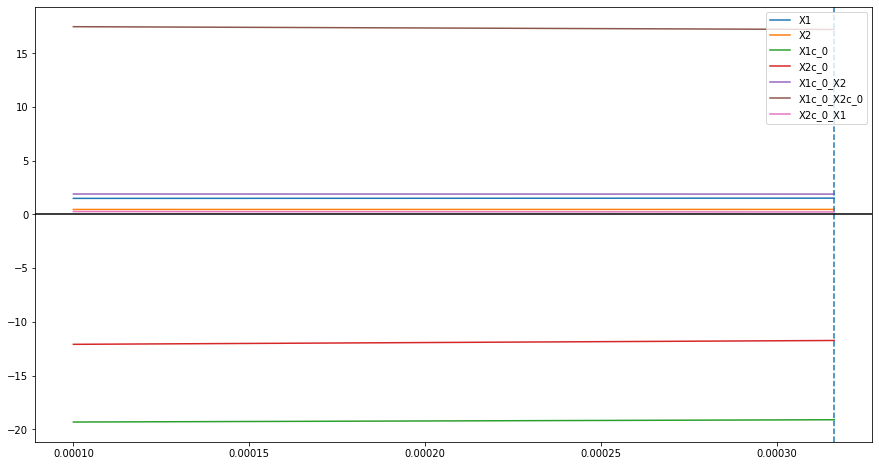

In [21]:
Lasso_plot(dm.drop('y', axis = 1), dm['y'], alphas = np.logspace(-4, -3.5, 30))

In [22]:
df['X1c'] = df['X1c'].astype('category')
df['X2c'] = df['X2c'].astype('category')

In [23]:
Importance(df, ['X1', 'X2', 'X1c', 'X2c'], 'y',category = ['X1c', 'X2c'])

,Features,Importance
1,X2,0.517908
0,X1,0.478373
2,X1c,0.002536
3,X2c,0.001183
